# **Implementation of a Convolutional Neural Network**

*By: Aunhel John M. Adoptante*

**In this project, we implemented a simple convolutional neural network for image classification. The model was trained to classify whether the input image is a cat or a dog.**

## **Import Libraries**

In [66]:
pip install opencv-python visualkeras

Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import visualkeras

## **Load Dataset**

```Training and Initial Test Dataset: Cats-vs-Dogs
Original Source: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset```

```Benchmark Dataset #1: Cats & Dogs
Original Source: https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs```

```Benchmark Dataset #2: Cat and Dog
Original Source: https://www.kaggle.com/datasets/tongpython/cat-and-dog```

```Benchmark Dataset #3: Dogs & Cats Images
Original Source: https://www.kaggle.com/datasets/chetankv/dogs-cats-images```

In [36]:
data = "D:\CNN\Cats-vs-Dogs\PetImages"
testdata1 = "D:/CNN/Cat & Dogs/dataset/test_set"
testdata2 = "D:/CNN/Cat and Dog/test_set/test_set"
testdata3 = "D:/CNN/Dogs & Cats Images/dataset/test_set"

*Note: Change paths to custom directory where your datasets are saved*

## **Image Analysis and Augmentation**

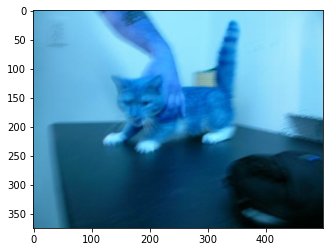

In [4]:
categories = ["cats", "dogs"]

for category in categories:
    path = os.path.join(data, category) # path to cats or dogs directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(375, 500, 3)


In [6]:
print(img_array)

[[[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [122 201 240]
  [121 200 239]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [122 201 240]
  [121 200 239]
  [121 200 239]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [121 200 239]]

 ...

 [[ 55 122 153]
  [ 55 122 153]
  [ 55 122 153]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 54 121 152]
  [ 54 121 152]
  [ 54 121 152]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]

 [[ 53 120 151]
  [ 53 120 151]
  [ 54 121 152]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]


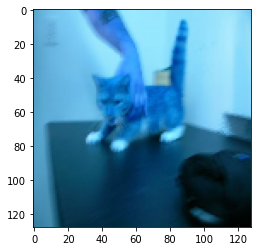

In [7]:
img_size = (128,128)

new_array = cv2.resize(img_array, img_size)
plt.imshow(new_array)
plt.show()

## **Create Training Data**

In [8]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data, category) # path to cats or dogs directory
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, img_size)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [9]:
print(len(training_data))

24946


In [10]:
#Shuffle data

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
1
0
0
1
0


In [12]:
X = [] # features
Y = [] # labels

for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, 128, 128, 3)
Y = np.array(Y)

## **Save Data to File for Future Use**

In [13]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

## **Load Data From File**

In [14]:
X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

## **Normalize Data**

In [15]:
X = X/255.0

In [16]:
print(X[:10])

[[[[0.32156863 0.27058824 0.29019608]
   [0.21960784 0.12941176 0.18431373]
   [0.30196078 0.19215686 0.2627451 ]
   ...
   [0.49019608 0.44705882 0.45882353]
   [0.41568627 0.37254902 0.38431373]
   [0.46666667 0.41176471 0.44705882]]

  [[0.34901961 0.29019608 0.31372549]
   [0.22352941 0.12941176 0.18431373]
   [0.2745098  0.16470588 0.23529412]
   ...
   [0.47843137 0.44313725 0.45490196]
   [0.49019608 0.45882353 0.46666667]
   [0.45098039 0.41568627 0.43137255]]

  [[0.37254902 0.31372549 0.33333333]
   [0.23529412 0.1372549  0.19215686]
   [0.29803922 0.18039216 0.25098039]
   ...
   [0.43529412 0.41568627 0.42352941]
   [0.36470588 0.34901961 0.35686275]
   [0.41176471 0.39215686 0.38823529]]

  ...

  [[0.80784314 0.81568627 0.84705882]
   [0.79215686 0.8        0.83529412]
   [0.8        0.80392157 0.83921569]
   ...
   [0.71764706 0.7372549  0.77647059]
   [0.70980392 0.7254902  0.76862745]
   [0.70980392 0.70980392 0.75294118]]

  [[0.78823529 0.79215686 0.83137255]
   [0.7

## **Create Model**

In [17]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

## **Visualize Model**

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 activation (Activation)     (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [71]:
visualkeras.layered_view(model, legend = True, to_file='model.png')

![alt text](model.png "Title")

## **Train Model**

In [18]:
model.fit(X, Y, batch_size = 64, validation_split = 0.3, epochs = 5)

Epoch 1/5
273/273 [==============================] - 3900s 14s/step - loss: 0.6621 - accuracy: 0.6263 - val_loss: 0.6190 - val_accuracy: 0.6705
Epoch 2/5
273/273 [==============================] - 4163s 15s/step - loss: 0.5737 - accuracy: 0.7068 - val_loss: 0.5661 - val_accuracy: 0.7074
Epoch 3/5
273/273 [==============================] - 4581s 17s/step - loss: 0.4791 - accuracy: 0.7660 - val_loss: 0.5365 - val_accuracy: 0.7293
Epoch 4/5
273/273 [==============================] - 4807s 18s/step - loss: 0.3826 - accuracy: 0.8289 - val_loss: 0.5149 - val_accuracy: 0.7559
Epoch 5/5
273/273 [==============================] - 4630s 17s/step - loss: 0.2794 - accuracy: 0.8827 - val_loss: 0.5636 - val_accuracy: 0.7663


## **Save Model**

### **As .model Format**

In [21]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


### **As .h5 Format**

In [69]:
model.save('64x3-CNN.h5')

## **Define Function fot Preprocessing Test Data**

In [56]:
categories_test = ["cats", "dogs"]

def prepare(filepath):
    test_data = []
    img_size = (128,128)
    for category in categories:
        path = os.path.join(filepath, category) # path to cats or dogs directory
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, img_size)
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
            
    random.shuffle(test_data)
    X = [] # features
    Y = [] # labels

    for features, label in test_data:
        X.append(features)
        Y.append(label)

    X = np.array(X).reshape(-1, 128, 128, 3)
    X = X/255.0
    Y = np.array(Y)
    
    return X, Y

## **Evaluate Test Data**

### **Benchmark Dataset #1**

In [57]:
a = prepare(testdata1)

In [58]:
model.evaluate(a[0], a[1], batch_size=32)

63/63 [==============================] - 60s 947ms/step - loss: 0.3186 - accuracy: 0.8770


[0.3185926675796509, 0.8769999742507935]

### **Benchmark Dataset #2**

In [59]:
b = prepare(testdata2)

In [60]:
model.evaluate(b[0], b[1], batch_size=32)

64/64 [==============================] - 68s 1s/step - loss: 0.3179 - accuracy: 0.8769


[0.3178943991661072, 0.876915454864502]

### **Benchmark Dataset #3**

In [61]:
c = prepare(testdata3)

In [62]:
model.evaluate(c[0], c[1], batch_size=32)

63/63 [==============================] - 73s 1s/step - loss: 0.3186 - accuracy: 0.8770


[0.3185926079750061, 0.8769999742507935]